1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


Using the eig decomposition, we find that:
Eigenvalue :  28.50674809475196 , eigenvector:  [-0.11723348 -0.81649658  0.5653226 ]
Eigenvalue :  -4.718178991231032e-16 , eigenvector:  [-0.57514247 -0.40824829 -0.70890371]
Eigenvalue :  1.8806290195033852 , eigenvector:  [-0.80960944  0.40824829  0.42174149]
Using the SVD decomposition, we find that:
Eigenvalue :  28.506748094751938 , eigenvector:  [-0.11723348  0.5653226  -0.81649658]
Eigenvalue :  1.8806290195033868 , eigenvector:  [-0.57514247 -0.70890371 -0.40824829]
Eigenvalue :  2.8351570205058974e-16 , eigenvector:  [-0.80960944  0.42174149  0.40824829]
Two of the three dimensions explain  (100+0j) % of the variability of the set
New dataset with only two dimensions: 
           0         2
0 -2.794304  1.451780
1  7.755372  0.082487
2  5.634768 -1.396742
3 -0.261183  1.622446
4  2.376549  0.357069
And the linear transformation is:
y1 =  -0.11723348466298639 x1 -0.5751424718163379 x2 -0.8096094411423117 x3
y2 =  -0.8164965809277261

,0,2
0,-2.794304,1.451780
1,7.755372,0.082487
2,5.634768,-1.396742
3,-0.261183,1.622446
4,2.376549,0.357069
...,...,...
995,2.019492,-0.735779
996,-1.852355,-0.822083
997,-4.588954,0.588450
998,7.959888,0.531231


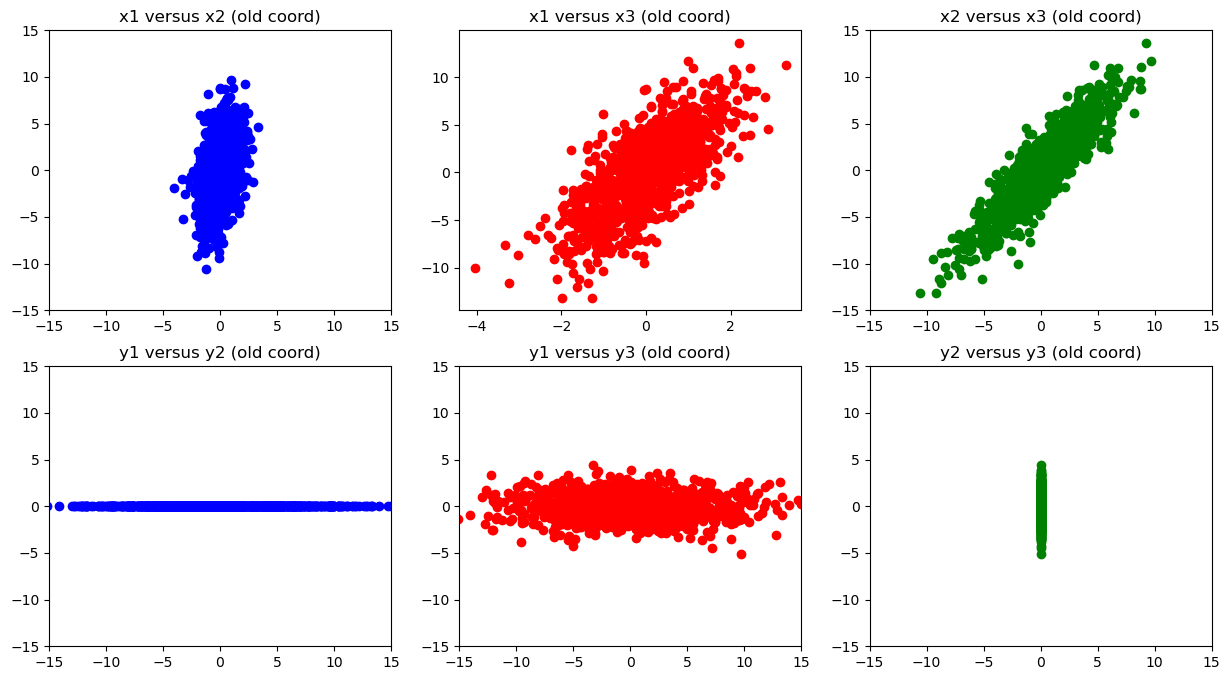

In [129]:
import pandas as pd
import numpy as np
from scipy import linalg as la

N = 1000
first_feature = np.random.normal(0,1, N)
second_feature = first_feature + np.random.normal(0,3,N)
third_feature = 2*first_feature + second_feature

# creating the dataset
dataset = pd.DataFrame({
    0: first_feature,
    1: second_feature,
    2: third_feature
})

#finding the covariance matrix
cov_m = np.cov(dataset.T)
L, V = la.eig(cov_m)

print("Using the eig decomposition, we find that:")
for (l, v) in (zip(L,V)):
    print("Eigenvalue : ", np.real_if_close(l), ", eigenvector: ", v)

print("Using the SVD decomposition, we find that:")
U, spectrum, Vt = la.svd(cov_m)  #three numpy arrays in return 
for (l,v) in zip(spectrum, U):
    print("Eigenvalue : ", np.real_if_close(l), ", eigenvector: ", v)

lowest_eigenvalue = L.min()
ratio = (np.trace(cov_m) - lowest_eigenvalue)/(np.trace(cov_m))
print("Two of the three dimensions explain ", ratio * 100, "% of the variability of the set")


#We can change the basis and get rid of one of the dimension that has small variance

rotated_dataset = dataset.dot(V)
red_dataset = rotated_dataset.drop(columns = np.argmin(L))
print("New dataset with only two dimensions: \n", red_dataset.head())





fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize=(15,8))

ax[0,0].scatter(x=dataset[0], y = dataset[1], c="b")
ax[0,0].set_title("x1 versus x2 (old coord)")
ax[0,0].set_xlim(-15,15)
ax[0,0].set_ylim(-15,15)

ax[0,1].scatter(x=dataset[0], y = dataset[2], c="r")
ax[0,1].set_title("x1 versus x3 (old coord)")
ax[0,0].set_xlim(-15,15)
ax[0,0].set_ylim(-15,15)

ax[0,2].scatter(x=dataset[1], y = dataset[2], c="g")
ax[0,2].set_title("x2 versus x3 (old coord)")
ax[0,2].set_xlim(-15,15)
ax[0,2].set_ylim(-15,15)

ax[1,0].scatter(x=rotated_dataset[0], y = rotated_dataset[1], c="b")
ax[1,0].set_title("y1 versus y2 (old coord)")
ax[1,0].set_xlim(-15,15)
ax[1,0].set_ylim(-15,15)

ax[1,1].scatter(x=rotated_dataset[0], y = rotated_dataset[2], c = "r")
ax[1,1].set_title("y1 versus y3 (old coord)")
ax[1,1].set_xlim(-15,15)
ax[1,1].set_ylim(-15,15)

ax[1,2].scatter(x=rotated_dataset[1], y = rotated_dataset[2], c = "g")
ax[1,2].set_title("y2 versus y3 (old coord)")
ax[1,2].set_xlim(-15,15)
ax[1,2].set_ylim(-15,15)
    
print("And the linear transformation is:")
print("y1 = ", V[0,0], "x1",V[1,0], "x2",V[2,0], "x3")
print("y2 = ", V[0,1], "x1",V[1,1], "x2",V[2,1], "x3")
print("y3 = ", V[0,2], "x1",V[1,2], "x2",V[2,2], "x3")

red_dataset

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

Reducing by keeping only the two highest eigenvalues will result in a loss of 0.013099212892872188 % of variability
transformation: y1 = 
-0.11723348477507492 x_ 1
-0.5751424460320906 x_ 2
-0.8096094155822405 x_ 3
7.451436249008202e-05 x_ 4
-0.00013239024372030216 x_ 5
8.65225293518232e-05 x_ 6
-0.00010734516195004517 x_ 7
-7.109729741720175e-05 x_ 8
-6.717386747839797e-05 x_ 9
-9.901491557930241e-05 x_ 10
3.1907135103755235e-05 x_ 11
8.353640960322376e-05 x_ 12
3.954864723025602e-05 x_ 13
And in effect the last 10 x_i have small influences


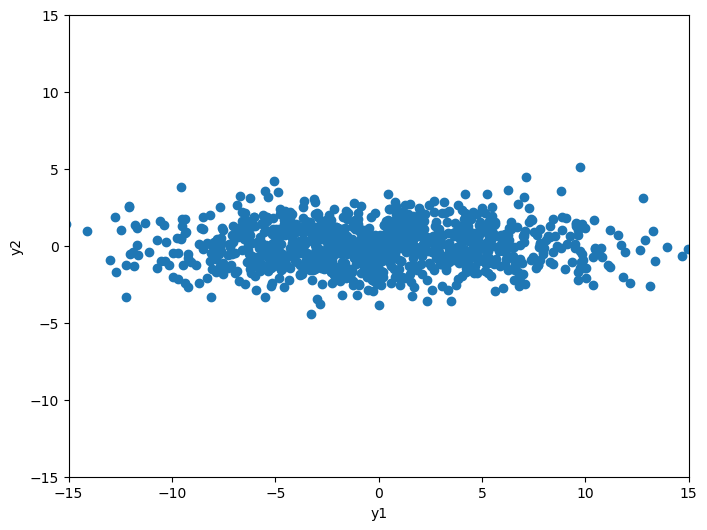

In [140]:
for i in range(10):
    dataset[i+3] = np.random.normal(0,1./50.,N)

#repearing the PCA procedure
cov_m = np.cov(dataset.T)
L, V = la.eig(cov_m)
ratio = (cov_m.trace()- L[0]-L[1])/(cov_m.trace())
print("Reducing by keeping only the two highest eigenvalues will result in a loss of",np.real_if_close(ratio*100), "% of variability")
#transform the dataset 
rotated_dataset = dataset.dot(V)
#we keep only the columns at position:
keep1 = np.argmax(L)
keep2 = np.argmax(np.delete(L,keep1)) + 1
red_dataset = rotated_dataset
for i in range(len(rotated_dataset.columns)):
    if (i != keep1) and (i != keep2):
        red_dataset = red_dataset.drop(columns = i)
red_dataset


fig, ax = plt.subplots(figsize= (8,6))
ax.scatter(x = red_dataset[0], y = red_dataset[1])
ax.set_xlim(-15,15)
ax.set_ylim(-15,15)
ax.set_xlabel("y1")
ax.set_ylabel("y2")

print("transformation: y1 = ")
for i in range(13):
    print(V[i,0], "x_", i+1)
print("And in effect the last 10 x_i have small influences")

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 